In [26]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import hamming_loss, zero_one_loss, f1_score
from skmultilearn.problem_transform import BinaryRelevance, LabelPowerset


from sklearn.neighbors import KNeighborsClassifier as kNN

import time

import matplotlib 
import matplotlib.pyplot as plt

In [27]:
yeast = pd.read_csv("D:/2021FALL/EC503/Project/coding part/yeast.csv")

In [28]:
X = yeast.iloc[:, 0: -14]
y = yeast.iloc[:, -14:]

In [29]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, random_state=0, train_size = 0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [30]:
# Custom accuracy score based on hamming loss implementation

def get_accuracy_score(y_test,y_pred):
    
    if 'numpy' not in str(type(y_pred)):
        y_pred = y_pred.to_numpy()
        
    if 'numpy' not in str(type(y_test)):
        y_test = y_test.to_numpy()
    
    
    assert(y_test.shape == y_pred.shape)
    
    if y_pred.shape[1] <= 5: #For a smaller number of labels, a ratio of half the labels being correct is good enough
        ratio = 0.5
    else:
        ratio = 0.7 #For a number of labels, at least 70% of the predicted labels must be correct
    
    acc_rows = []
    
    for i in range(len(y_test)):
        acc_rows.append(np.count_nonzero(y_test[i]==y_pred[i]))
#         acc_rows.append(np.count_nonzero(y_test.iloc[i,:].values==y_pred.iloc[i,:].values)) #Count the number of matches
        
    acc_rows = [1 if x/y_pred.shape[1] >= ratio else 0 for x in acc_rows] #1 if ratio of match in a row is greater than ratio, else 0
    return sum(acc_rows)/len(acc_rows) # Mean accuracy

In [31]:
k_range = list(range(31))

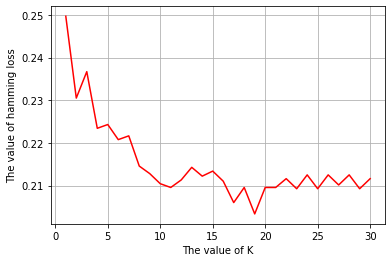

In [32]:
# try new method
test_hamming_loss_1 = []
for k_num in k_range[1:]:
    classifier = BinaryRelevance(
        classifier = kNN(n_neighbors = k_num),
        require_dense = [False, True]
    )
    classifier.fit(X_train, y_train)

    # train
    y_valid_res = classifier.predict(X_valid)

    test_hamming_loss_1.append(hamming_loss(y_valid, y_valid_res))
    
plt.plot(k_range[1:], test_hamming_loss_1, 'r', label = 'BR imported')
plt.xlabel('The value of K')
plt.ylabel('The value of hamming loss')
plt.grid(True)
plt.show()

In [35]:
BR_min = min(test_hamming_loss_1)
print(BR_min)
print(test_hamming_loss_1.index(BR_min))

0.20336481700118064
18


In [34]:
classifier = BinaryRelevance(
    classifier = kNN(n_neighbors = 19),
    require_dense = [False, True]
)
classifier.fit(X_train, y_train)

# train
y_pred = classifier.predict(X_test)

hamming_loss(y_test, y_pred)

0.19421487603305784

In [37]:
acc_score = []
for k_num in k_range[1:]:
    # initialize LabelPowerset multi-label classifier with a RandomForest
    classifier = BinaryRelevance(
        classifier = kNN(n_neighbors = k_num),
        require_dense = [False, True]
    )

    # train
    classifier.fit(X_train, y_train)

    # predict
    y_valid_res = classifier.predict(X_valid)
    y_valid_res = pd.DataFrame.sparse.from_spmatrix(y_valid_res)
#     display(hamming_loss(y_test, y_pred))
    acc_score.append(get_accuracy_score(y_valid, y_valid_res))

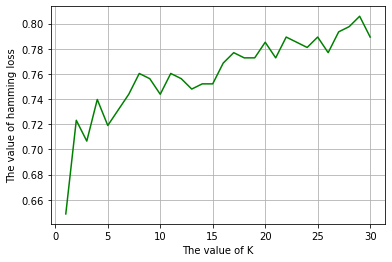

In [40]:
plt.plot(k_range[1:], acc_score, 'g', label = 'BR imported')
plt.xlabel('The value of K')
plt.ylabel('The value of hamming loss')
plt.grid(True)
# plt.savefig('D:/2021FALL/EC503/Project/coding part/BRhamming_loss_yeast.png')
plt.show()

In [41]:
BRmax = max(acc_score)
print(BRmax)
print(acc_score.index(BRmax))

0.8057851239669421
28


In [42]:
classifier = BinaryRelevance(
    classifier = kNN(n_neighbors = 29),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
y_pred = pd.DataFrame.sparse.from_spmatrix(y_pred)
#     display(hamming_loss(y_test, y_pred))
get_accuracy_score(y_test, y_pred)

0.8057851239669421

In [5]:
start_time = time.time()
classifier = BinaryRelevance(
    classifier = kNN(n_neighbors = 13),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 2.334423542022705 seconds ---


In [14]:
# LP

In [43]:
LPtest_hamming_loss = []
for k_num in k_range[1:]:
    classifier = LabelPowerset(
        classifier = kNN(n_neighbors = k_num),
        require_dense = [False, True]
    )

    # train
    classifier.fit(X_train, y_train)

    # predict
    y_valid_res = classifier.predict(X_valid)
    
    hamming_loss_value = hamming_loss(y_valid, y_valid_res)
    LPtest_hamming_loss.append(hamming_loss_value)

In [44]:
LPacc_score = []
for k_num in k_range[1:]:
    # initialize LabelPowerset multi-label classifier with a RandomForest
    classifier = LabelPowerset(
        classifier = kNN(n_neighbors = k_num),
        require_dense = [False, True]
    )

    # train
    classifier.fit(X_train, y_train)

    # predict
    y_valid_res = classifier.predict(X_valid)
    y_valid_res = pd.DataFrame.sparse.from_spmatrix(y_valid_res)
    LPacc_score.append(get_accuracy_score(y_valid, y_valid_res))

Text(0, 0.5, 'hamming loss')

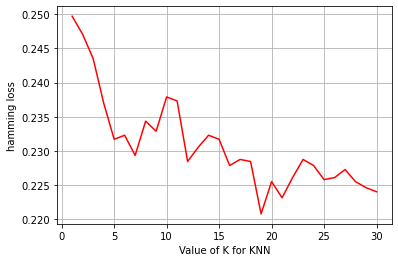

In [45]:
plt.plot(k_range[1:],LPtest_hamming_loss, 'r')
plt.grid(True)
plt.xlabel('Value of K for KNN')
plt.ylabel('hamming loss')
# plt.savefig('D:/2021FALL/EC503/Project/coding part/LPhamming_loss_yeast.png')

In [47]:
LPmin = min(LPtest_hamming_loss)
print(LPmin)
print(LPtest_hamming_loss.index(LPmin))

0.22077922077922077
18


In [48]:
classifier = LabelPowerset(
    classifier = kNN(n_neighbors = 19),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)

hamming_loss(y_test, y_pred)

0.21074380165289255

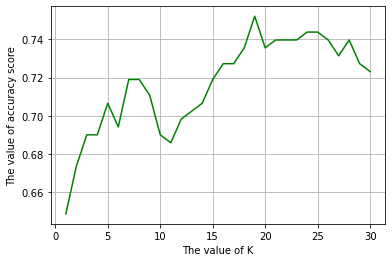

In [46]:
plt.plot(k_range[1:], LPacc_score, 'g')
plt.xlabel('The value of K')
plt.ylabel('The value of accuracy score')
plt.grid(True)
# plt.savefig('D:/2021FALL/EC503/Project/coding part/LPaccuracy_yeast.png')
plt.show()

In [50]:
LPmax = max(LPacc_score)
print(LPmax)
print(LPacc_score.index(LPmax))

0.7520661157024794
18


In [52]:
classifier = LabelPowerset(
        classifier = kNN(n_neighbors = 19),
        require_dense = [False, True]
    )

# train
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
y_pred = pd.DataFrame.sparse.from_spmatrix(y_pred)
get_accuracy_score(y_test, y_pred)

0.7768595041322314

In [ ]:
# find the argminK

In [10]:
start_time = time.time()
classifier = LabelPowerset(
    classifier = kNN(n_neighbors = 13),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

# result when the laptop is uncharged

--- 0.20412063598632812 seconds ---


In [ ]:
# some unuseful metric

In [29]:
test_f1 = []
for k_num in k_range[1:]:
    # initialize LabelPowerset multi-label classifier with a RandomForest
    classifier = BinaryRelevance(
        classifier = kNN(n_neighbors = k_num),
        require_dense = [False, True]
    )

    # train
    classifier.fit(X_train, y_train)

    # predict
    y_pred = classifier.predict(X_test)
#     display(hamming_loss(y_test, y_pred))
    test_f1.append(f1_score(y_test, y_pred, average = 'macro'))

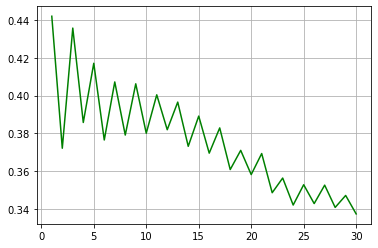

In [30]:
plt.plot(k_range_1[1:], test_f1, 'g', label = 'BR imported')
plt.grid(True)
plt.show()

In [15]:
test_zeroone_loss_1 = []
for k_num in k_range[1:]:
    # initialize LabelPowerset multi-label classifier with a RandomForest
    classifier = BinaryRelevance(
        classifier = kNN(n_neighbors = k_num),
        require_dense = [False, True]
    )

    # train
    classifier.fit(X_train, y_train)

    # predict
    y_pred = classifier.predict(X_test)
#     display(hamming_loss(y_test, y_pred))
    test_zeroone_loss_1.append(zero_one_loss(y_test, y_pred))

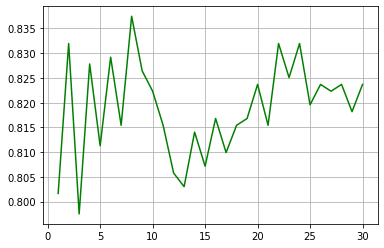

In [16]:
plt.plot(k_range_1[1:], test_zeroone_loss_1, 'g', label = 'BR imported')
plt.grid(True)
plt.show()